In [177]:
import numpy as np
import matplotlib.pyplot as plt

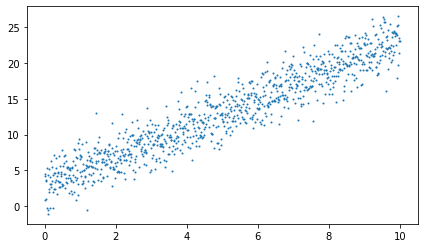

In [178]:
def R2_coef(y_true,y_pred):
    """
    Calculates coefficient of determination 
    """
    u,v = 0,0
    for i in range(len(X)):
        u += (y_true[i] - y_pred[i])**2
        v += (y_true[i] - np.mean(y_true))**2
    print("Coefficient of determination is: ",float(1 - u/v))

def func(a,x,b):
    N_points = len(x)
    scaling = 40
    mu, sigma = 0, 0.05
    noise = np.random.normal(mu,sigma,size=N_points)*scaling
    return a*x+b+noise

## Generating data ##
N_points = 1000
x_train = np.linspace(0, 10, num=N_points)
y_train = func(2,x_train,3)

fig, ax = plt.subplots(1,1,figsize=(7,4))
ax.plot(x_train,y_train,'o',ms=1) # Normal
plt.show()

## Normal linear regression
\begin{equation}
\bold{W} = (\bold{X}^T\bold{X})^{-1}\bold{X}^T\bold{y}
\end{equation}

Coefficient of determination is:  0.8936058450388631


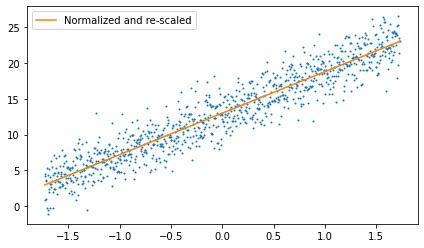

In [179]:
######## Normalizing s.t. each feature (column) has mean = 0 and then variance = 1 ########
x_train_norm = x_train.reshape((len(x_train),1))
y_train_norm = y_train.reshape((len(y_train),1))

# Labels
y_train_norm_mean, y_train_norm_var = np.mean(y_train_norm), np.std(y_train_norm) 
y_train_norm = y_train_norm - y_train_norm_mean     ## mean
y_train_norm = y_train_norm * 1./y_train_norm_var   ## variance
# Feature vectors
for col in range(x_train_norm.shape[1]):
    x_train_norm[:,col] = x_train_norm[:,col] - np.mean(x_train_norm[:,col])       ## mean
    x_train_norm[:,col] = x_train_norm[:,col] * 1./np.std(x_train_norm[:,col])     ## variance

####### LINEAR REGRESSION ####### 
X_init = np.reshape(x_train_norm,(N_points,1))
Y_init = np.reshape(y_train_norm,(N_points,1))
X_norm = np.ones((X_init.shape[0],X_init.shape[1]+1)) 
for col in range(1,X_norm.shape[1]):
    X_norm[:,col] = X_init[:,col-1]
# Computing optimal weight vector
Y_norm = Y_init
X_normT = X_norm.T
X_normTX_norm = X_normT @ X_norm
X_normTX_norm_INVERSE = np.linalg.inv(X_normTX_norm)
W_optimal_norm = (X_normTX_norm_INVERSE @ X_normT) @ Y_norm
# Checking predictions
def predict(xs,weight):
    ys = []
    # Computing inner product
    for i in range(len(xs)):
        yi = 0
        for j in range(2):
            yi += xs[i][j]*weight[j]
        ys.append(float(yi))
    return np.array(ys)

y_pred = predict(X_norm,W_optimal_norm)*y_train_norm_var+y_train_norm_mean

fig, ax = plt.subplots(1,1,figsize=(7,4))
ax.plot(x_train,y_train,'o',ms=1)
ax.plot(x_train,y_pred,'-',ms=1,label="Normalized and re-scaled")
ax.legend()
R2_coef(y_train.reshape((len(y_train),1)),y_pred)
plt.show()

## Regularization by Ridge regression
\begin{equation}
\bold{W} = (\bold{X}^T\bold{X}+\lambda\bold{I})^{-1}\bold{X}^T\bold{y},\quad \lambda\geq0
\end{equation}

Coefficient of determination is:  0.8864711103101062


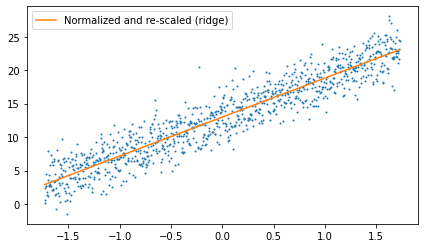

In [180]:
## Generating data ##
N_points = 1000
x_train = np.linspace(0, 10, num=N_points)
y_train = func(2,x_train,3)

######## Normalizing s.t. each feature (column) has mean = 0 and then variance = 1 ########
x_train_norm = x_train.reshape((len(x_train),1))
y_train_norm = y_train.reshape((len(y_train),1))

# Labels
y_train_norm_mean, y_train_norm_var = np.mean(y_train_norm), np.std(y_train_norm) 
y_train_norm = y_train_norm - y_train_norm_mean     ## mean
y_train_norm = y_train_norm * 1./y_train_norm_var   ## variance
# Feature vectors
for col in range(x_train_norm.shape[1]):
    x_train_norm[:,col] = x_train_norm[:,col] - np.mean(x_train_norm[:,col])       ## mean
    x_train_norm[:,col] = x_train_norm[:,col] * 1./np.std(x_train_norm[:,col])     ## variance

####### RIDGE REGRESSION ####### 

# Adding 1 as first coord to all feature vectors
X_norm_ridge = np.ones((x_train_norm.shape[0],x_train_norm.shape[1]+1)) 
for col in range(1,X_norm_ridge.shape[1]):
    X_norm_ridge[:,col] = x_train_norm[:,col-1]

# Computing optimal weight vector
lmbda = 0.1
I = np.identity(X_norm_ridge.shape[1])
Y_norm_ridge = y_train_norm
XT_norm_ridge = X_norm_ridge.T
XTX_norm_ridge = XT_norm_ridge @ X_norm_ridge
XTX_INVERSE_norm_ridge = np.linalg.inv(XTX_norm_ridge + lmbda * I)
W_optimal_norm_ridge = ((XTX_INVERSE_norm_ridge @ XT_norm_ridge) @ Y_norm_ridge)

# Checking predictions
y_pred = predict(X_norm,W_optimal_norm_ridge)*y_train_norm_var+y_train_norm_mean

fig, ax = plt.subplots(1,1,figsize=(7,4))
ax.plot(x_train,y_train,'o',ms=1)
ax.plot(x_train,y_pred,'-',ms=1,label="Normalized and re-scaled (ridge)")
ax.legend()
R2_coef(y_train.reshape((len(y_train),1)),y_pred)
plt.show()


## Regularization by Lasso regression (no closed form)

Coefficient of determination is:  0.8862101392329981


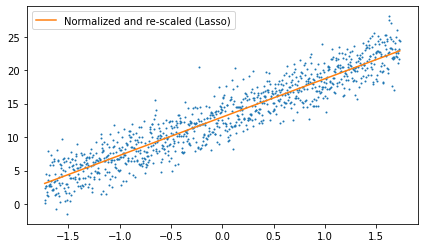

In [181]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

x_train = x_train.reshape((len(x_train),1))
y_train = y_train.reshape((len(y_train),1))

# Adding 1 as first coord to all feature vectors
X_lasso = np.ones((x_train.shape[0],x_train.shape[1]+1)) 
for i in range(X_lasso.shape[0]):
    X_lasso[i,1] = x_train[i]

clf.fit(X=X_lasso,y=y_train)
W_optimal_lasso = np.array([clf.intercept_[0],clf.coef_[1]])

y_pred = predict(X_lasso,W_optimal_lasso)
fig, ax = plt.subplots(1,1,figsize=(7,4))
ax.plot(x_train,y_train,'o',ms=1)
ax.plot(x_train,y_pred,'-',ms=1,label="Normalized and re-scaled (Lasso)")
ax.legend()
R2_coef(y_train.reshape((len(y_train),1)),y_pred)
plt.show()


## Regression tree

Coefficient of determination is:  0.8920453713175739


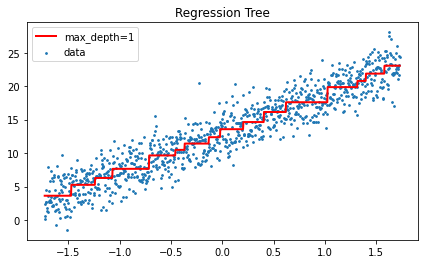

In [182]:
from sklearn.tree import DecisionTreeRegressor

X = x_train
y = y_train

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(X, y)

# Predict
X_test = np.linspace(np.min(x_train), np.max(x_train), 1000)[:, np.newaxis]
y_pred = regr_1.predict(X_test)

# Plot the results
plt.figure(figsize=(7,4))
plt.scatter(X, y, s=3, label="data")
plt.plot(X_test, y_pred, color='r', label="max_depth=1", linewidth=2)
plt.title("Regression Tree")
plt.legend()
R2_coef(y_train,y_pred)
plt.show()

##  Regression tree with adaboost

Coefficient of determination is:  0.8937140275925348


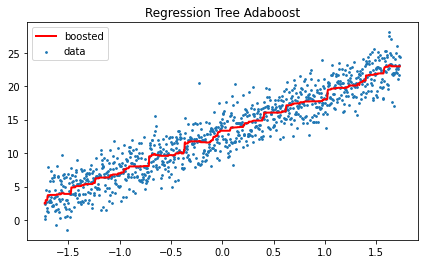

In [183]:
from sklearn.ensemble import AdaBoostRegressor



# Fit regression model
regression_loss_funcs = ['linear','square','exponential']
base_reg = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(base_estimator=base_reg, n_estimators=30, 
                           learning_rate = 0.1, loss=regression_loss_funcs[2], random_state=0)

regr_2.fit(X, y.flatten())

# Predict
y_pred = regr_2.predict(X)

# Plot the results
plt.figure(figsize=(7,4))
plt.scatter(X, y, s=3,label="data")
plt.plot(X_test, y_pred, color='red', label="boosted", linewidth=2)

plt.title("Regression Tree Adaboost")
plt.legend()
R2_coef(y_train,y_pred)
plt.show()

## Regression tree with gradient boost

Coefficient of determination is:  0.898215458033355


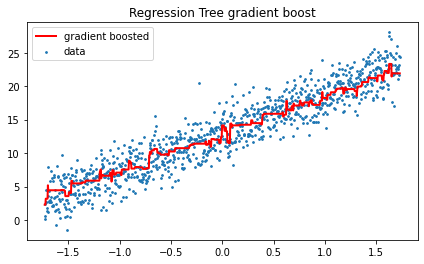

In [184]:
from sklearn.ensemble import GradientBoostingRegressor

## Loss functions
regression_loss_funcs = ['squared_error', 'absolute_error', 'huber', 'quantile']

## Defining model (using 20% for validation set and using early stopping)
reg = GradientBoostingRegressor(loss=regression_loss_funcs[0], learning_rate=0.1, n_estimators=30, 
                                subsample=1.0, criterion='friedman_mse', max_depth=4, 
                                min_impurity_decrease=0.0, random_state=0, 
                                max_features=None, alpha=0.9, max_leaf_nodes=None, 
                                validation_fraction=0.2, n_iter_no_change=1, # Any int -> using early stopping 
                                tol=0.0001, ccp_alpha=0.0)

# Fitting               
reg.fit(X, y.flatten())

# Predicting
y_pred = reg.predict(X)

# Plotting
plt.figure(figsize=(7,4))
plt.scatter(X, y, s=3,label="data")
plt.plot(X_test, y_pred, color='red', label="gradient boosted", linewidth=2)

plt.title("Regression Tree gradient boost")
plt.legend()
R2_coef(y_train,y_pred)   